<a href="https://colab.research.google.com/github/AkiBae4891/DS-Unit-2-Applied-Modeling/blob/master/Tokyo_Olympics_2020_Hostels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokyo Hostels: Price Predictions

## Tokyo2020 is coming, many people will be staying in hostels to enjoy the games! 

In [0]:
import pandas as pd

In [0]:
# file is directly downloaded from kaggle 
# Website found = 'https://www.kaggle.com/koki25ando/hostel-world-dataset'


hostels = pd.read_csv('Hostel.csv')

In [4]:
!pip install --upgrade pandas-profiling

     |████████████████████████████████| 133kB 5.0MB/s 
     |████████████████████████████████| 614kB 16.9MB/s 
     |████████████████████████████████| 225kB 37.6MB/s 
     |████████████████████████████████| 768kB 46.4MB/s 
     |████████████████████████████████| 51kB 11.0MB/s 
     |████████████████████████████████| 194kB 43.3MB/s 
     |████████████████████████████████| 737kB 42.4MB/s 
     |████████████████████████████████| 51kB 19.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: /root/.cache/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1

In [1]:
# later will use profile to see data clearly
import pandas_profiling
pandas_profiling.__version__

'2.3.0'

In [3]:
# check what types are in each column 
hostels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 16 columns):
Unnamed: 0       342 non-null int64
hostel.name      342 non-null object
City             342 non-null object
price.from       342 non-null int64
Distance         342 non-null object
summary.score    327 non-null float64
rating.band      327 non-null object
atmosphere       327 non-null float64
cleanliness      327 non-null float64
facilities       327 non-null float64
location.y       327 non-null float64
security         327 non-null float64
staff            327 non-null float64
valueformoney    327 non-null float64
lon              298 non-null float64
lat              298 non-null float64
dtypes: float64(10), int64(2), object(4)
memory usage: 42.8+ KB


In [4]:
# We will be predicting price, need price.from (may change column name later)

hostels['price.from'].describe()

count    3.420000e+02
mean     8.388012e+03
std      7.641527e+04
min      1.000000e+03
25%      2.000000e+03
50%      2.500000e+03
75%      2.900000e+03
max      1.003200e+06
Name: price.from, dtype: float64

In [0]:
# rename columns for easier reading 
hostels.columns=['Unnamed', 'Name', 'City', 'Price', 'Distance', 'Summary', 'Rating', 'Atmosphere',
                 'Cleanliness', 'Facilities', 'Location', 'Security', 'Staff', 'Value',
                 'Longitude', 'Latitude']

In [6]:
# changed Price column values into floats 
hostels['Price'].astype(float, inplace=True)

0         3300.0
1         2600.0
2         3600.0
3         2600.0
4         1500.0
5         2100.0
6         3300.0
7         2000.0
8         2500.0
9         2200.0
10        1600.0
11        2000.0
12        2200.0
13        2900.0
14        2000.0
15        1800.0
16        2700.0
17        2400.0
18        1600.0
19        1300.0
20        3600.0
21        2000.0
22        3500.0
23        2600.0
24        2600.0
25        1800.0
26        2100.0
27        1500.0
28        2200.0
29        3800.0
         ...    
312       2300.0
313       3700.0
314       2500.0
315       3000.0
316    1003200.0
317       3300.0
318       2000.0
319       3800.0
320       3000.0
321       2500.0
322       2500.0
323       1500.0
324       2500.0
325       2100.0
326       5400.0
327       2300.0
328       1500.0
329       3200.0
330       2500.0
331       3000.0
332       5200.0
333       2500.0
334       2000.0
335       4000.0
336       2500.0
337       2300.0
338       2000.0
339       2500

In [0]:
pd.set_option('float_format', '{:f}'.format)

In [8]:
# There is a value at 1,003,200 yen, and it's throwing off everything. need to edit it. 
hostels['Price'].describe()

count       342.000000
mean       8388.011696
std       76415.272323
min        1000.000000
25%        2000.000000
50%        2500.000000
75%        2900.000000
max     1003200.000000
Name: Price, dtype: float64

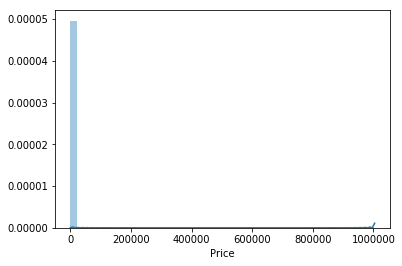

In [9]:
import seaborn as sns

sns.distplot(hostels.Price);

In [0]:
# changed the outlier 
# use drop row  using .loc
hostels['Price'] = hostels['Price'].replace(1003200, 6000)

In [11]:
hostels['Price'].dtype

dtype('int64')

In [0]:
# Removed "KM from the city center" from the numbers in Distance 
hostels['Distance'] = hostels['Distance'].replace(r'[km from city centre]+$', '', regex=True).astype(float)

In [0]:
# feature engineering: dropped 'Unnamed' 
hostels.drop(columns='Unnamed', inplace=True)

In [24]:
hostels.profile_report()

## Every column has NA values, need to sort that out 

In [14]:
# check how many NA values and where 
hostels.isnull().sum()

Name            0
City            0
Price           0
Distance        0
Summary        15
Rating         15
Atmosphere     15
Cleanliness    15
Facilities     15
Location       15
Security       15
Staff          15
Value          15
Longitude      44
Latitude       44
dtype: int64

In [0]:
# Fill NA values 
hostels['Summary'].fillna((hostels['Summary'].mean()), inplace=True)
hostels['Rating'].fillna((hostels['Rating'].mode()[0]), inplace=True)
hostels['Atmosphere'].fillna((hostels['Atmosphere'].mean()), inplace=True)
hostels['Cleanliness'].fillna((hostels['Cleanliness'].mean()), inplace=True)
hostels['Facilities'].fillna((hostels['Facilities'].mean()), inplace=True)
hostels['Location'].fillna((hostels['Location'].mean()), inplace=True)
hostels['Security'].fillna((hostels['Security'].mean()), inplace=True)
hostels['Staff'].fillna((hostels['Staff'].mean()), inplace=True)
hostels['Value'].fillna((hostels['Value'].mean()), inplace=True)
hostels['Longitude'].fillna((hostels['Longitude'].mode()[0]), inplace=True)
hostels['Latitude'].fillna((hostels['Latitude'].mode()[0]), inplace=True)

In [16]:
# check if NA values are gone: had to use [0] for the mode to work. Not sure why 
hostels.isnull().sum()

Name           0
City           0
Price          0
Distance       0
Summary        0
Rating         0
Atmosphere     0
Cleanliness    0
Facilities     0
Location       0
Security       0
Staff          0
Value          0
Longitude      0
Latitude       0
dtype: int64

In [18]:
hostels.head(10)

,Name,City,Price,Distance,Summary,Rating,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,Value,Longitude,Latitude
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.900000,9.200000,Superb,8.900000,9.400000,9.300000,8.900000,9.000000,9.400000,9.400000,135.513767,34.682678
1,& And Hostel,Fukuoka-City,2600,0.700000,9.500000,Superb,9.400000,9.700000,9.500000,9.700000,9.200000,9.700000,9.500000,139.780326,35.696562
2,&And Hostel Akihabara,Tokyo,3600,7.800000,8.700000,Fabulous,8.000000,7.000000,9.000000,8.000000,10.000000,10.000000,9.000000,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.700000,7.400000,Very Good,8.000000,7.500000,7.500000,7.500000,7.000000,8.000000,6.500000,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.500000,9.400000,Superb,9.500000,9.500000,9.000000,9.000000,9.500000,10.000000,9.500000,139.798371,35.727898
5,1night1980hostel Tokyo,Tokyo,2100,9.400000,7.000000,Very Good,5.500000,8.000000,6.000000,6.000000,8.500000,8.500000,6.500000,139.786950,35.724384
6,328 Hostel & Lounge,Tokyo,3300,16.500000,9.300000,Superb,8.700000,9.700000,9.300000,9.100000,9.300000,9.700000,8.900000,139.745467,35.548044
7,36Hostel,Hiroshima,2000,1.600000,9.500000,Superb,8.800000,9.900000,9.200000,9.600000,9.800000,9.800000,9.500000,139.780326,35.696562
8,3Q House - Asakusa Smile,Tokyo,2500,10.200000,8.782569,Superb,8.238838,9.011927,8.597554,8.694801,8.947401,9.133333,8.848318,139.780326,35.696562
9,Ace Inn Shinjuku,Tokyo,2200,3.000000,7.700000,Very Good,6.700000,7.200000,6.800000,8.500000,7.800000,8.500000,8.100000,139.724304,35.692512


## Now to start working the code 

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [18]:
# Create Training and Test variables 
y = hostels['Price']
hostelfeatures = hostels[['Distance', 'Summary', 'Atmosphere', 'Cleanliness',	'Facilities',
                          'Location',	'Security', 'Staff',	'Value', 'Longitude', 'Latitude']]
X_train, X_test, y_train, y_test = train_test_split(hostelfeatures, y, test_size=0.10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(307, 11) (307,)
(35, 11) (35,)


made train and test split 

In [0]:
# fit model on training data, predict the test data
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
pred = lm.predict(X_test)

In [20]:
# getting baseline 
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print('Mean Baseline:')
print('Mean Absolute Error', mean_absolute_error(y_test, y_pred))
print('R^2 score', r2_score(y_test, y_pred))

Mean Baseline:
Mean Absolute Error 574.9552092801778
R^2 score -0.23499728316452617


In [21]:
y_test.head()

169    2000
205    2500
271    2600
247    2500
283    1900
Name: Price, dtype: int64

In [22]:
# predictions look far from what I guessed 
pred[0:5]

array([1811.20501752, 2559.7199214 , 2560.18194412, 2126.94775972,
       2982.34857418])

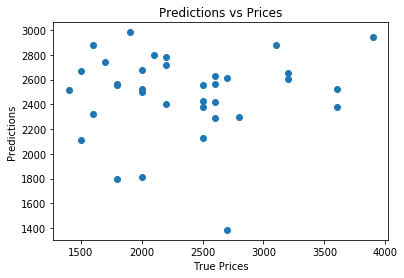

In [83]:
plt.scatter(y_test, pred)
plt.xlabel('True Prices')
plt.ylabel('Predictions')
plt.title('Predictions vs Prices');

In [24]:
print("Score:", model.score(X_test, y_test))

Score: -0.23499728316452617


## Linear Regression 

In [25]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print('Linear Regression:')
print('Mean Absolute Error', mean_absolute_error(y_test, y_pred))
print('R^2 score', r2_score(y_test, y_pred))

Linear Regression:
Mean Absolute Error 574.9552092801778
R^2 score -0.23499728316452617


In [27]:
# coefficients 

print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, X_train.columns)
print(coefficients.to_string())

Intercept -6071.312387901153
Distance       -19.062799
Summary         20.682667
Atmosphere     117.545323
Cleanliness    185.100393
Facilities      20.756985
Location        34.744877
Security        75.961359
Staff            1.552882
Value         -387.725942
Longitude       81.094018
Latitude       -83.649071


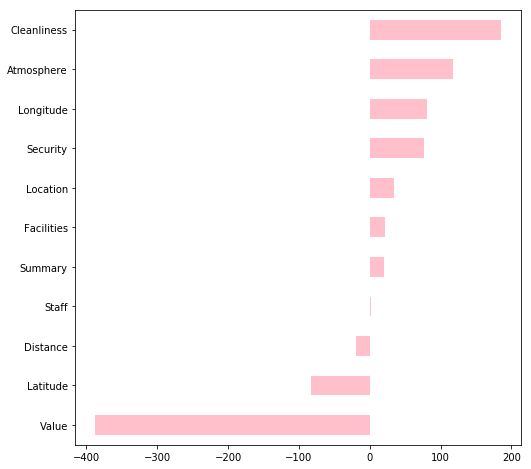

In [28]:
%matplotlib inline
coefficients.sort_values().plot.barh(color='pink', figsize=(8,8));

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

hostels_scaled = preprocessing.scale(hostelfeatures)
hostels_scaled

array([[-0.615849  ,  0.44494571,  0.4900085 , ...,  0.5392758 ,
        -0.51066412, -0.20162327],
       [-1.0957711 ,  0.76471988,  0.86057459, ...,  0.63702701,
         0.82465423,  0.32723759],
       [ 0.4530684 , -0.08801124, -0.17701047, ...,  0.14827095,
         0.82376113,  0.32769938],
       ...,
       [ 2.56908857,  0.5515371 ,  0.93468781, ...,  0.73477822,
         0.85246834,  0.35661651],
       [-0.7249222 , -0.83415097, -0.695803  , ..., -1.51349964,
        -0.43702282, -0.0374709 ],
       [ 0.03859023, -0.19460263, -0.10289725, ..., -0.34048511,
         0.81269552,  0.30580324]])

## Baseline with RMSLE

In [0]:
# mean squared log error, (root mean squared log error: rmsle)

import numpy as np
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [31]:
# getting prediction, using rmsle 
# target = 'Price'
# y_train = train[target]
# y_test = test[target]
y_pred = np.full_like(y_test, fill_value=y_train.mean())
print('Validation RMSLE, Mean Baseline:', rmsle(y_test, y_pred))

Validation RMSLE, Mean Baseline: 0.2918359660705375


## Let's try to beat .28 

In [32]:
# R^2 can be negative if we fit on different data than we trained on. Neg but tiny value. 
# this can be rounded to zero, no variance. if it was training? it might be exactly 0 
from sklearn.metrics import r2_score
print('Validation R^2, Mean Baseline:', r2_score(y_test, y_pred))

Validation R^2, Mean Baseline: -0.123530475312436


In [33]:
# Fit random forest with 1 feature 

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)
print('Validation R^2', r2)

Validation R^2 0.12247082027817614


In [34]:
y_pred = model.predict(X_test)
print(f'Validation RMSLE, Random Forest with {hostels_scaled}')
print(rmsle(y_test, y_pred))

Validation RMSLE, Random Forest with [[-0.615849    0.44494571  0.4900085  ...  0.5392758  -0.51066412
  -0.20162327]
 [-1.0957711   0.76471988  0.86057459 ...  0.63702701  0.82465423
   0.32723759]
 [ 0.4530684  -0.08801124 -0.17701047 ...  0.14827095  0.82376113
   0.32769938]
 ...
 [ 2.56908857  0.5515371   0.93468781 ...  0.73477822  0.85246834
   0.35661651]
 [-0.7249222  -0.83415097 -0.695803   ... -1.51349964 -0.43702282
  -0.0374709 ]
 [ 0.03859023 -0.19460263 -0.10289725 ... -0.34048511  0.81269552
   0.30580324]]
0.25629888908982223


## 0.2562

## Log-transform regression target with right-skewed distribution

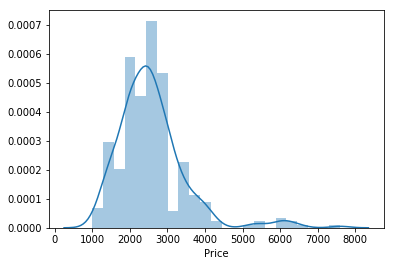

In [85]:
# Plot right skewed distribution 

%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

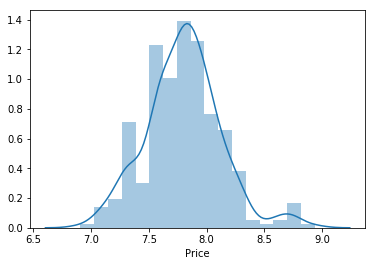

In [36]:
y_train_log = np.log1p(y_train)
sns.distplot(y_train_log);

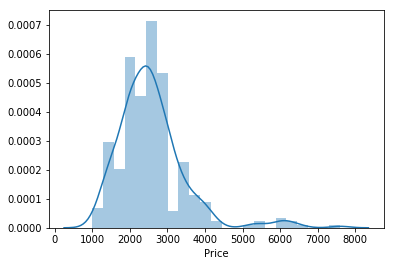

In [37]:
# same as original, before log 
y_train_log_exp = np.expm1(y_train_log)
sns.distplot(y_train_log_exp);

In [38]:
all(np.isclose(y_train_log_exp, y_train))

True

### Refit model with log-transformed target

In [39]:
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
rmsle(y_test, y_pred)

0.23981611535084932

## 0.2398

### RMSLE with original targets = RMSE with log-transformed targets

In [0]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [41]:
y_test_log = np.log1p(y_test)
rmse(y_test_log, y_pred_log)

0.23981611535084932

## Pipeline 

In [42]:
!pip install category_encoders

In [43]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_test)
rmse(y_test_log, y_pred_log)

0.23981611535084943

In [44]:
y_pred = np.expm1(y_pred_log)
rmsle(y_test, y_pred)

0.23981611535084943

## .23981

## Feature Importances 

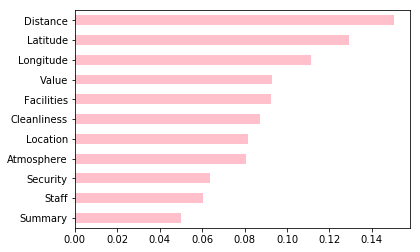

In [45]:
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)
importances.sort_values().plot.barh(color='pink');

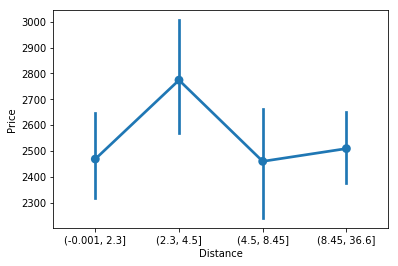

In [51]:
# try using hostels , the errors look huge 
quantity_quartiles = pd.qcut(hostels['Distance'], q=4)
sns.pointplot(x=quantity_quartiles, y=hostels['Price']);

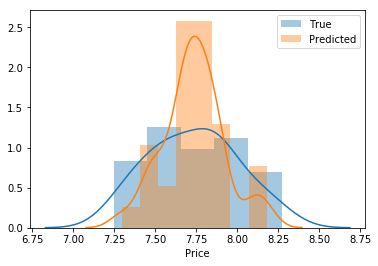

In [84]:
import matplotlib.pyplot as plt
sns.distplot(y_test_log, label='True')
sns.distplot(y_pred_log, label='Predicted')
plt.legend();

In [55]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_test)
rmse(y_test_log, y_pred_log)

0.23981611535084932

## Getting .23 now 

# Use Gradient Boosting 

In [56]:
import xgboost as xgb
xgb.__version__

'0.90'

In [57]:
%%time

from xgboost import XGBRegressor
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=100, n_jobs=-1)
)
pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_test)
print('Validation Error', rmse(y_test_log, y_pred_log))

[11:38:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation Error 0.24389153865768973
CPU times: user 63.6 ms, sys: 5.84 ms, total: 69.5 ms
Wall time: 48.9 ms


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


### 0.24

In [58]:
%%time

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=1000, n_jobs=-1)
)
pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_test)
print('Validation Error', rmse(y_test_log, y_pred_log))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:38:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation Error 0.22754273388033197
CPU times: user 489 ms, sys: 20 ms, total: 509 ms
Wall time: 273 ms


### 0.22

## Use early stopping 

In [59]:
import category_encoders as ce
from xgboost import XGBRegressor

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

eval_set = [(X_train_encoded, y_train_log), 
            (X_test_encoded, y_test_log)]

model = XGBRegressor(n_estimators=1000, n_jobs=-1)
model.fit(X_train_encoded, y_train_log, 
          early_stopping_rounds=10, eval_metric='rmse', 
          eval_set=eval_set)

[11:39:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:6.58142	validation_1-rmse:6.50829
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:5.92708	validation_1-rmse:5.85367
[2]	validation_0-rmse:5.33815	validation_1-rmse:5.26443
[3]	validation_0-rmse:4.80812	validation_1-rmse:4.73407
[4]	validation_0-rmse:4.33116	validation_1-rmse:4.25673
[5]	validation_0-rmse:3.90198	validation_1-rmse:3.82714
[6]	validation_0-rmse:3.51586	validation_1-rmse:3.44057
[7]	validation_0-rmse:3.16853	validation_1-rmse:3.09275
[8]	validation_0-rmse:2.85617	validation_1-rmse:2.77985
[9]	validation_0-rmse:2.57532	validation_1-rmse:2.4984
[10]	validation_0-rmse:2.32289	validation_1-rmse:2.24532
[11]	validation_0-rmse:2.09607	validation_1-rmse:2.0178
[12]	validation_0-rmse:1.89237	validation_

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[28]	validation_0-rmse:0.448151	validation_1-rmse:0.3948
[29]	validation_0-rmse:0.419708	validation_1-rmse:0.3705
[30]	validation_0-rmse:0.394232	validation_1-rmse:0.347796
[31]	validation_0-rmse:0.372841	validation_1-rmse:0.329078
[32]	validation_0-rmse:0.352674	validation_1-rmse:0.313855
[33]	validation_0-rmse:0.336502	validation_1-rmse:0.298918
[34]	validation_0-rmse:0.322674	validation_1-rmse:0.287878
[35]	validation_0-rmse:0.309226	validation_1-rmse:0.280056
[36]	validation_0-rmse:0.298079	validation_1-rmse:0.274396
[37]	validation_0-rmse:0.289032	validation_1-rmse:0.269318
[38]	validation_0-rmse:0.279372	validation_1-rmse:0.266811
[39]	validation_0-rmse:0.272824	validation_1-rmse:0.263389
[40]	validation_0-rmse:0.265096	validation_1-rmse:0.260415
[41]	validation_0-rmse:0.25887	validation_1-rmse:0.257273
[42]	validation_0-rmse:0.253755	validation_1-rmse:0.257538
[43]	validation_0-rmse:0.249866	validation_1-rmse:0.256467
[44]	validation_0-rmse:0.245527	validation_1-rmse:0.256546
[4

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

##0.1808 and  0.2448

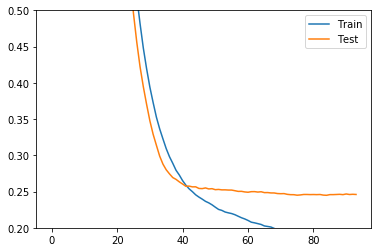

In [61]:
results = model.evals_result()
train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']
epoch = range(len(train_rmse))
plt.plot(epoch, train_rmse, label='Train')
plt.plot(epoch, test_rmse, label='Test')
plt.ylim(0.2,0.5)
plt.legend();

# Basemap

In [71]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (90.2 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 131289 files and directories currently installed.)
Pre

In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

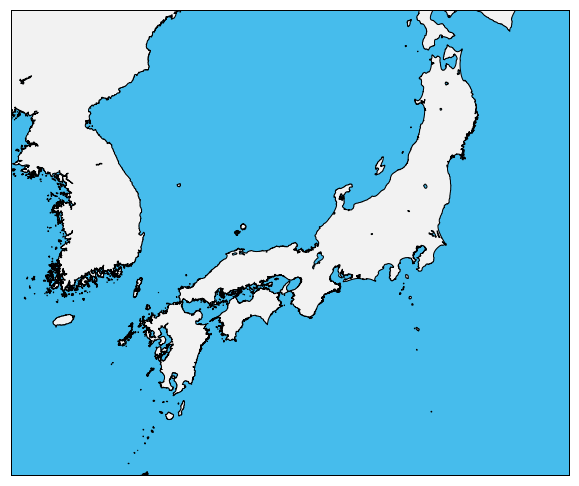

In [76]:
# westlimit=124.58; southlimit=28.41; eastlimit=145.45; northlimit=42.51
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=124.58, llcrnrlat= 28.41, urcrnrlon=145.45, urcrnrlat=42.51)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()


###map

In [80]:
# 5 Unique Cities 
hostels['City'].describe()

count       342
unique        5
top       Tokyo
freq        127
Name: City, dtype: object

In [0]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [63]:
# Make pipeline!
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Validation Accuracy', accuracy_score(y_test, y_pred))

Validation Accuracy 0.0


In [64]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0,

In [65]:
pipeline.named_steps['randomforestclassifier'].classes_

array([1000, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
       3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
       5200, 5400, 5500, 6000, 6200, 6300, 6500, 7600])

In [66]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

array([1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2500, 2600,
       2700, 2800, 3100, 3200, 3600, 3900])

In [67]:
# Output from unique_labels matches our model's classes_ attribute
pipeline.named_steps['randomforestclassifier'].classes_

array([1000, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
       3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
       5200, 5400, 5500, 6000, 6200, 6300, 6500, 7600])